Fetching dataset...
Train samples: (60000, 28, 28)
Test samples: (10000, 28, 28)
Preparing images for training...
Initializing model architecture...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compiling model...
Starting training for 15 epochs...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 290ms/step - accuracy: 0.7338 - loss: 0.7932 - precision: 0.8291 - recall: 0.6307 - val_accuracy: 0.8808 - val_loss: 0.3347 - val_precision: 0.9025 - val_recall: 0.8563
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 120s 285ms/step - accuracy: 0.8676 - loss: 0.3769 - precision: 0.9020 - recall: 0.8318 - val_accuracy: 0.8958 - val_loss: 0.2798 - val_precision: 0.9221 - val_recall: 0.8725
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - accuracy: 0.8876 - loss: 0.3107 - precision: 0.9138 - recall: 0.8625 - val_accuracy: 0.9063 - val_loss: 0.2508 - val_precision: 0.9254 - val_recall: 0.8913
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 279ms/step - accuracy: 0.9024 - loss: 0.2742 - precision: 0.9230 - recall: 0.8806 - val_accuracy: 0.9133 - val_loss: 0.2360 - val_precision: 0.9290 - val_recall: 0.9027
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 145s 286ms/step - accuracy: 0.9142 - loss: 0.2399 

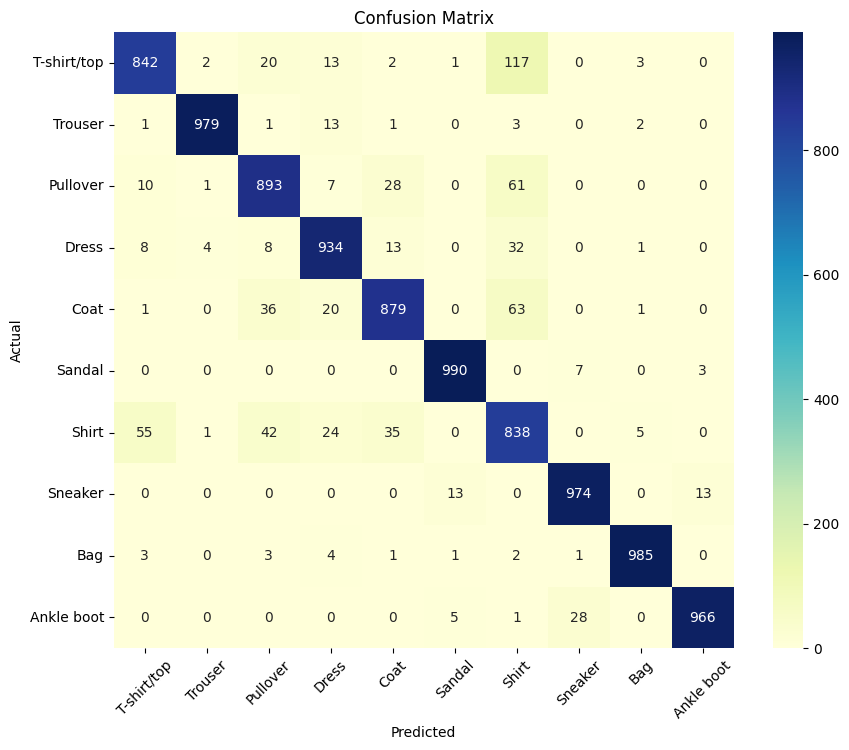

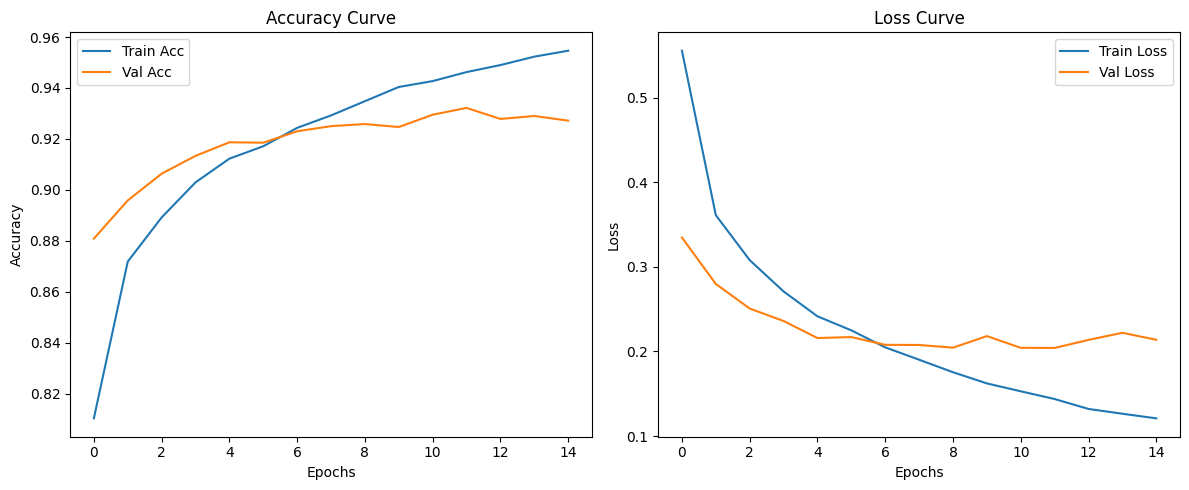


=== Model Evaluation Insights ===
- Accuracy reflects general correctness.
- Precision indicates how often predicted positives are correct.
- Recall highlights how many actual positives are caught.
- F1 balances the two, especially useful in skewed class cases.
- Confusion matrix gives per-class misclassification insight.
- Check for overfitting via training/validation comparison.

Generating predictions for sample images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Image 0:
  True Label   : Ankle boot (9)
  Prediction   : Ankle boot (9)
  Confidence   : 100.00%
  All Classes:
    T-shirt/top : 0.00%
    Trouser     : 0.00%
    Pullover    : 0.00%
    Dress       : 0.00%
    Coat        : 0.00%
    Sandal      : 0.00%
    Shirt       : 0.00%
    Sneaker     : 0.00%
    Bag         : 0.00%
    Ankle boot  : 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Image 12:
  True Label   : Sneaker (7)
  Prediction   : Sneaker (7)
  Confidence   : 75.33%
  All Classes:
    T-shirt/top : 0.00%
    Tr

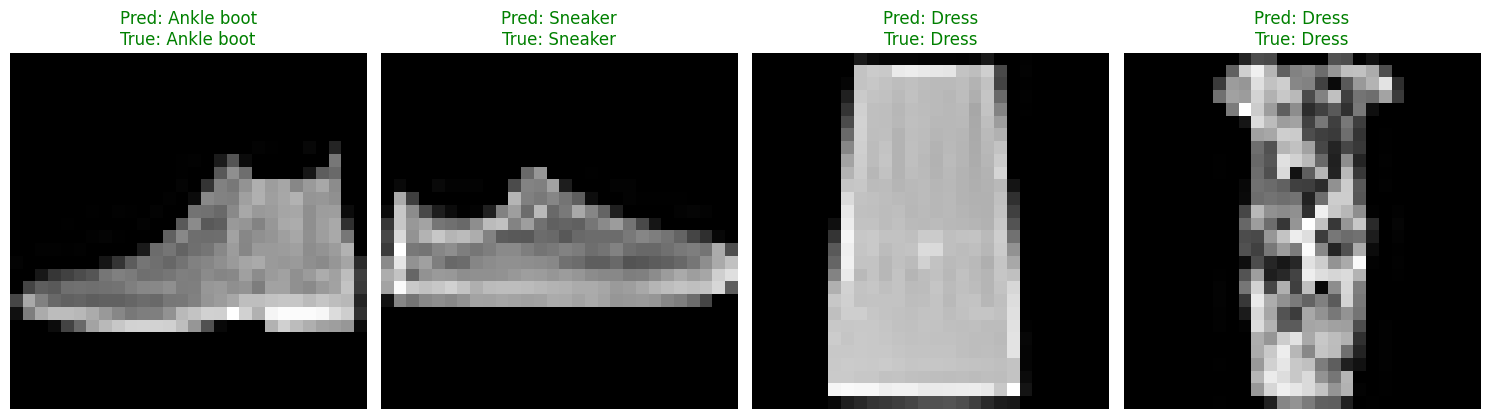

Saved model to refactored_fashion_cnn.keras


In [5]:
# Configure matplotlib for inline display in Colab
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, utils
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

class ApparelClassifier:
    """
    CNN model for Fashion MNIST classification with evaluation and visualization tools.
    Refactored version of a previously approved implementation.
    """

    def __init__(self, n_classes=10, img_shape=(28, 28, 1)):
        """
        Set initial parameters and prepare placeholders for data and model.
        """
        self.n_classes = n_classes
        self.img_shape = img_shape
        self.model = None
        self.train_images = self.train_labels = None
        self.test_images = self.test_labels = None
        self.orig_test_labels = None  # Keep raw labels for reporting
        self.labels = [
            "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
        ]
        self.training_logs = None

    def import_data(self):
        """
        Fetch the Fashion MNIST dataset.
        """
        print("Fetching dataset...")
        (self.train_images, self.train_labels), (self.test_images, self.orig_test_labels) = keras.datasets.fashion_mnist.load_data()
        self.test_labels = self.orig_test_labels.copy()

        print(f"Train samples: {self.train_images.shape}")
        print(f"Test samples: {self.test_images.shape}")

    def prepare_data(self):
        """
        Normalize and reshape dataset images, and one-hot encode train labels.
        """
        if self.train_images is None:
            raise RuntimeError("Data not loaded yet!")

        print("Preparing images for training...")
        self.train_images = np.expand_dims(self.train_images.astype('float32') / 255.0, -1)
        self.test_images = np.expand_dims(self.test_images.astype('float32') / 255.0, -1)
        self.train_labels = utils.to_categorical(self.train_labels, self.n_classes)

    def create_model(self):
        """
        Construct CNN using Keras Sequential API.
        """
        print("Initializing model architecture...")

        self.model = Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=self.img_shape, kernel_initializer='he_normal'),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Flatten(),
            layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
            layers.Dropout(0.5),
            layers.Dense(self.n_classes, activation='softmax')
        ])
        self.model.summary()

    def setup_model(self):
        """
        Compile model with accuracy, precision, and recall metrics.
        """
        print("Compiling model...")
        self.model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
        )

    def run_training(self, batch_size=128, epochs=15):
        """
        Fit model to training data and log history.
        """
        print(f"Starting training for {epochs} epochs...")
        self.training_logs = self.model.fit(
            self.train_images, self.train_labels,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.1,
            verbose=1
        )

    def test_model(self):
        """
        Assess model performance and plot evaluation visuals.
        """
        print("\nTesting model...")

        loss, acc, precision, recall = self.model.evaluate(
            self.test_images, utils.to_categorical(self.orig_test_labels), verbose=0
        )

        print(f"\nAccuracy:  {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1 Score:  {2 * (precision * recall) / (precision + recall):.4f}")

        predictions = np.argmax(self.model.predict(self.test_images), axis=1)

        print("\nClassification Breakdown:")
        print(classification_report(self.orig_test_labels, predictions, target_names=self.labels))

        self.show_conf_matrix(self.orig_test_labels, predictions)
        self.plot_history()

    def plot_history(self):
        """
        Plot accuracy and loss from training log.
        """
        if not self.training_logs:
            print("No training log available.")
            return

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.training_logs.history['accuracy'], label='Train Acc')
        plt.plot(self.training_logs.history['val_accuracy'], label='Val Acc')
        plt.title("Accuracy Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.training_logs.history['loss'], label='Train Loss')
        plt.plot(self.training_logs.history['val_loss'], label='Val Loss')
        plt.title("Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def show_conf_matrix(self, actual, predicted):
        """
        Display confusion matrix using seaborn heatmap.
        """
        cm = confusion_matrix(actual, predicted)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                    xticklabels=self.labels, yticklabels=self.labels)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()

    def visualize_predictions(self, sample_indices=None, count=4):
        """
        Display predictions and confidence for sample test images.
        """
        if sample_indices is None:
            sample_indices = np.random.choice(len(self.test_images), count, replace=False)

        plt.figure(figsize=(15, 5))
        for i, index in enumerate(sample_indices):
            image = self.test_images[index]
            probs = self.model.predict(np.expand_dims(image, 0))[0]
            pred_idx = np.argmax(probs)
            true_idx = self.orig_test_labels[index]

            plt.subplot(1, count, i+1)
            plt.imshow(image.squeeze(), cmap='gray')
            plt.title(f"Pred: {self.labels[pred_idx]}\nTrue: {self.labels[true_idx]}",
                      color='green' if pred_idx == true_idx else 'red')
            plt.axis('off')

            print(f"\nImage {index}:")
            print(f"  True Label   : {self.labels[true_idx]} ({true_idx})")
            print(f"  Prediction   : {self.labels[pred_idx]} ({pred_idx})")
            print(f"  Confidence   : {probs[pred_idx]:.2%}")
            print("  All Classes:")
            for lbl, prob in zip(self.labels, probs):
                print(f"    {lbl:12s}: {prob:.2%}")

        plt.tight_layout()
        plt.show()

    def explain_results(self):
        """
        Summarize and explain evaluation metrics.
        """
        print("\n=== Model Evaluation Insights ===")
        print("- Accuracy reflects general correctness.")
        print("- Precision indicates how often predicted positives are correct.")
        print("- Recall highlights how many actual positives are caught.")
        print("- F1 balances the two, especially useful in skewed class cases.")
        print("- Confusion matrix gives per-class misclassification insight.")
        print("- Check for overfitting via training/validation comparison.")

    def export_model(self, save_path):
        """
        Save the model to a file.
        """
        self.model.save(save_path)
        print(f"Saved model to {save_path}")

# --- Script Entry ---
if __name__ == "__main__":
    clf = ApparelClassifier()

    clf.import_data()
    clf.prepare_data()
    clf.create_model()
    clf.setup_model()
    clf.run_training(epochs=15)

    clf.test_model()
    clf.explain_results()
    print("\nGenerating predictions for sample images...")
    clf.visualize_predictions([0, 12, 42, 100])

    clf.export_model("refactored_fashion_cnn.keras")
